# Uploading the dataset

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Read JSON Lines") \
    .getOrCreate()

In [2]:
df_all_beauty = spark.read.json("file:///home/work/Project/All_Beauty.jsonl")

In [3]:
df_all_beauty.show(10)

+----------+------------+--------------------+-----------+------+--------------------+-------------+--------------------+--------------------+-----------------+
|      asin|helpful_vote|              images|parent_asin|rating|                text|    timestamp|               title|             user_id|verified_purchase|
+----------+------------+--------------------+-----------+------+--------------------+-------------+--------------------+--------------------+-----------------+
|B00YQ6X8EO|           0|                  []| B00YQ6X8EO|   5.0|This spray is rea...|1588687728923|Such a lovely sce...|AGKHLEW2SOWHNMFQI...|             true|
|B081TJ8YS3|           1|                  []| B081TJ8YS3|   4.0|This product does...|1588615855070|Works great but s...|AGKHLEW2SOWHNMFQI...|             true|
|B07PNNCSP9|           2|                  []| B097R46CSY|   5.0|Smells good, feel...|1589665266052|                Yes!|AE74DYR3QUGVPZJ3P...|             true|
|B09JS339BZ|           0|         

In [4]:
df_beauty_personal = spark.read.json("file:///home/work/Project/Beauty_and_Personal_Care.jsonl")

In [5]:
df_beauty_personal.show(10)

+----------+------------+--------------------+-----------+------+--------------------+-------------+--------------------+--------------------+-----------------+
|      asin|helpful_vote|              images|parent_asin|rating|                text|    timestamp|               title|             user_id|verified_purchase|
+----------+------------+--------------------+-----------+------+--------------------+-------------+--------------------+--------------------+-----------------+
|B00Z03RC80|           0|[{IMAGE, https://...| B00Z03RC80|   1.0|Opened the packag...|1616743454733|Gasoline!! Seriou...|AFKZENTNBQ7A7V7UX...|             true|
|B085PRT2MP|           0|[{IMAGE, https://...| B085PRT2MP|   1.0|Tops the list for...|1614915977684|Useless!  These h...|AFKZENTNBQ7A7V7UX...|             true|
|B08G81QQ9L|           0|                  []| B08G81QQ9L|   5.0|Bought this for m...|1612052493701|Hailey loves unic...|AFKZENTNBQ7A7V7UX...|             true|
|B07YYG76X1|           0|         

In [6]:
df_beauty_personal.columns

['asin',
 'helpful_vote',
 'images',
 'parent_asin',
 'rating',
 'text',
 'timestamp',
 'title',
 'user_id',
 'verified_purchase']

In [7]:
df_beauty_personal_limited = df_beauty_personal.limit(300000)

In [8]:
df_beauty_personal_limited.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)



In [9]:
df_all_beauty.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)



In [10]:

# Step 2: Append (union) to df_all_beauty
df = df_all_beauty.union(df_beauty_personal_limited)


In [11]:
df.printSchema()


root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)



In [12]:
df.describe().show()


[Stage 6:===============================================>           (4 + 1) / 5]

+-------+--------------------+------------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+
|summary|                asin|      helpful_vote|         parent_asin|            rating|              text|           timestamp|            title|             user_id|
+-------+--------------------+------------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+
|  count|             1001528|           1001528|             1001528|           1001528|           1001528|             1001528|          1001528|             1001528|
|   mean| 4.643753734410852E9|1.0362885510939284|4.1757668388154507E9| 4.051302609612512| 9.666666666666666|1.557130451983129...|           4377.5|                NULL|
| stddev|3.7159386133975925E9| 9.584701507029312| 3.559611635799032E9|1.4191017834747355|26.198943020370407| 8.16203011247121E10|36821.51818248615|        

## Trnsforming the dataset to pandas dataframe for better understanding

In [13]:
df.limit(10).toPandas()


,asin,helpful_vote,images,parent_asin,rating,text,timestamp,title,user_id,verified_purchase
0,B00YQ6X8EO,0,[],B00YQ6X8EO,5.0,This spray is really nice. It smells really go...,1588687728923,Such a lovely scent but not overpowering.,AGKHLEW2SOWHNMFQIJGBECAF7INQ,True
1,B081TJ8YS3,1,[],B081TJ8YS3,4.0,"This product does what I need it to do, I just...",1588615855070,Works great but smells a little weird.,AGKHLEW2SOWHNMFQIJGBECAF7INQ,True
2,B07PNNCSP9,2,[],B097R46CSY,5.0,"Smells good, feels great!",1589665266052,Yes!,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,True
3,B09JS339BZ,0,[],B09JS339BZ,1.0,Felt synthetic,1643393630220,Synthetic feeling,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,True
4,B08BZ63GMJ,0,[],B08BZ63GMJ,5.0,Love it,1609322563534,A+,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,True
5,B00R8DXL44,0,"[(IMAGE, https://images-na.ssl-images-amazon.c...",B00R8DXL44,4.0,The polish was quiet thick and did not apply s...,1598567408138,Pretty Color,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,True
6,B099DRHW5V,0,[],B099DRHW5V,5.0,Great for many tasks. I purchased these for m...,1631885519443,Handy,AHREXOGQPZDA6354MHH4ETSF3MCQ,True
7,B088SZDGXG,0,"[(IMAGE, https://m.media-amazon.com/images/I/8...",B08BBQ29N5,3.0,These were lightweight and soft but much too s...,1634275259292,Meh,AEYORY2AVPMCPDV57CE337YU5LXA,True
8,B08P2DZB4X,0,[],B08P2DZB4X,5.0,This is perfect for my between salon visits. I...,1627391044559,Great for at home use and so easy to use!,AFSKPY37N3C43SOI5IEXEK5JSIYA,False
9,B086QY6T7N,0,[],B086QY6T7N,5.0,I get Keratin treatments at the salon at least...,1626614511145,Nice shampoo for the money,AFSKPY37N3C43SOI5IEXEK5JSIYA,False


## Checking if there is any missing (null) values

In [14]:
from pyspark.sql.functions import col, sum as spark_sum

df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


[Stage 11:======================================================> (81 + 2) / 83]

+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
|asin|helpful_vote|images|parent_asin|rating|text|timestamp|title|user_id|verified_purchase|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
|   0|           0|     0|          0|     0|   0|        0|    0|      0|                0|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+



## checking for duplicates

In [15]:
df.groupBy("user_id", "asin", "timestamp", "text").count().filter("count > 1").show()


[Stage 19:==============================================>           (4 + 1) / 5]

+--------------------+----------+-------------+--------------------+-----+
|             user_id|      asin|    timestamp|                text|count|
+--------------------+----------+-------------+--------------------+-----+
|AHKCOGPJ2X44W4FSZ...|B07FCHMPKC|1623122044794|I don't recommend...|    2|
|AFZBGMT5OXWIJME5P...|B096VJ4QSP|1647199430137|Found this item h...|    2|
|AESRKXIPXTO6NNWJX...|B08K7C8G4M|1633442020740|Good product grea...|    2|
|AHFWMROY2V2ICCBTL...|B004CGBN0Y|1449158583000|The mirror need b...|    2|
|AHW4RM32F7UDMQ5ET...|B07HR754WV|1566999122529|Great variety and...|    2|
|AF2JFLH4622DV2ROK...|B013063DRM|1468390269000|I try my best to ...|    2|
|AFFOED6TG7P5VMP6M...|B07DP93T3D|1532894797917|Amazing and refre...|    2|
|AGCGY3VHXPCE5S7X6...|B010TQC4R6|1470540528000|Complete waste of...|    2|
|AE23RCA5KAQT3REAB...|B07F6TG5N4|1550171687597|Received unit abo...|    2|
|AEGO3QQN3F7QTO75K...|B00KGMSSQA|1423521768000|   I love this case!|    2|
|AEPOHJGNEI55UGS45...|B09

## Checking the count of per rating

In [16]:
df.groupBy("rating").count().orderBy("rating").show()



[Stage 23:=======================================================>(82 + 1) / 83]

+------+------+
|rating| count|
+------+------+
|   1.0|121916|
|   2.0| 56952|
|   3.0| 81738|
|   4.0|128151|
|   5.0|612771|
+------+------+



# Exploratory data analysis

## Rating Distribution

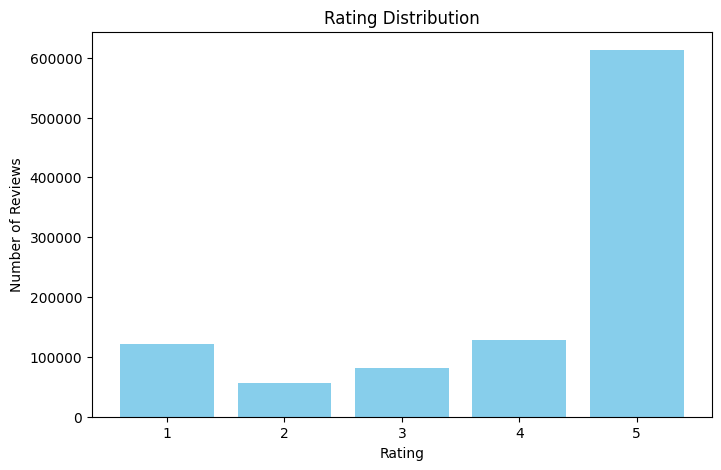

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
rating_counts = df.groupBy("rating").count().orderBy("rating")
rating_pd = rating_counts.toPandas()

# Plot
plt.figure(figsize=(8,5))
plt.bar(rating_pd["rating"], rating_pd["count"], color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Rating Distribution")
plt.show()


## Reviews Over Time

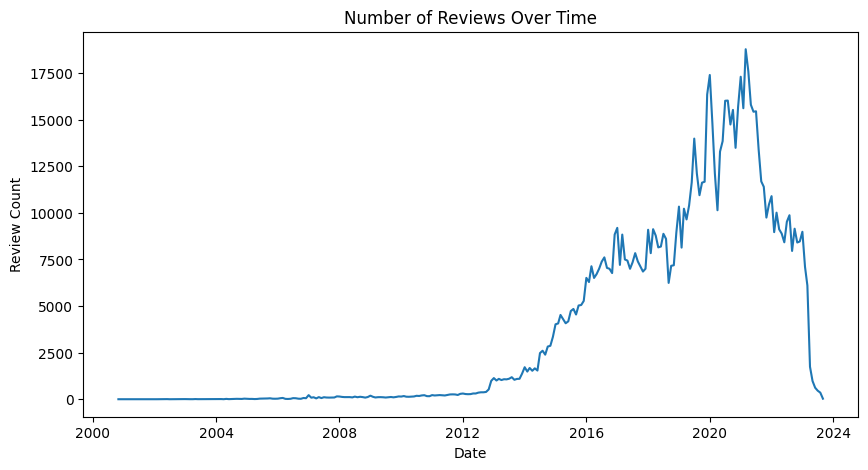

In [18]:
from pyspark.sql.functions import col, from_unixtime, length, size, explode, year, month

df = df.withColumn("review_date", from_unixtime(col("timestamp") / 1000).cast("date"))
monthly_reviews = df.groupBy(year("review_date").alias("year"), month("review_date").alias("month")).count().orderBy("year", "month")
monthly_pd = monthly_reviews.toPandas()

# Plot
monthly_pd["date"] = pd.to_datetime(monthly_pd["year"].astype(str) + "-" + monthly_pd["month"].astype(str))
plt.figure(figsize=(10,5))
plt.plot(monthly_pd["date"], monthly_pd["count"])
plt.title("Number of Reviews Over Time")
plt.ylabel("Review Count")
plt.xlabel("Date")
plt.show()


## Text Length vs. Rating

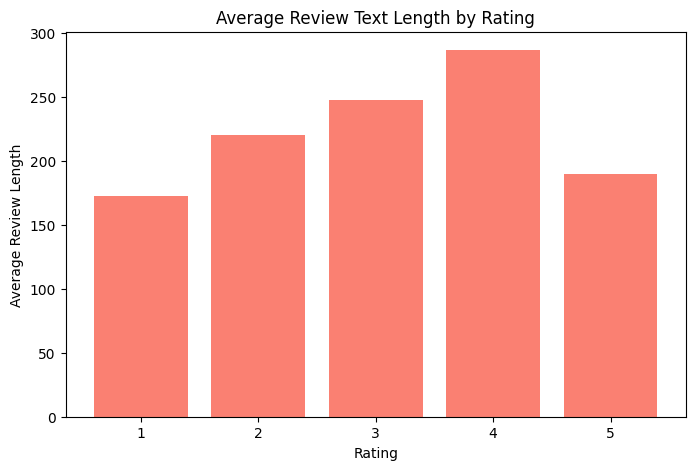

In [19]:
df = df.withColumn("text_length", length(col("text")))
avg_length = df.groupBy("rating").avg("text_length").orderBy("rating")
avg_length_pd = avg_length.toPandas()

# Plot
plt.figure(figsize=(8,5))
plt.bar(avg_length_pd["rating"], avg_length_pd["avg(text_length)"], color='salmon')
plt.xlabel("Rating")
plt.ylabel("Average Review Length")
plt.title("Average Review Text Length by Rating")
plt.show()


## Verified Purchase vs Rating Distribution

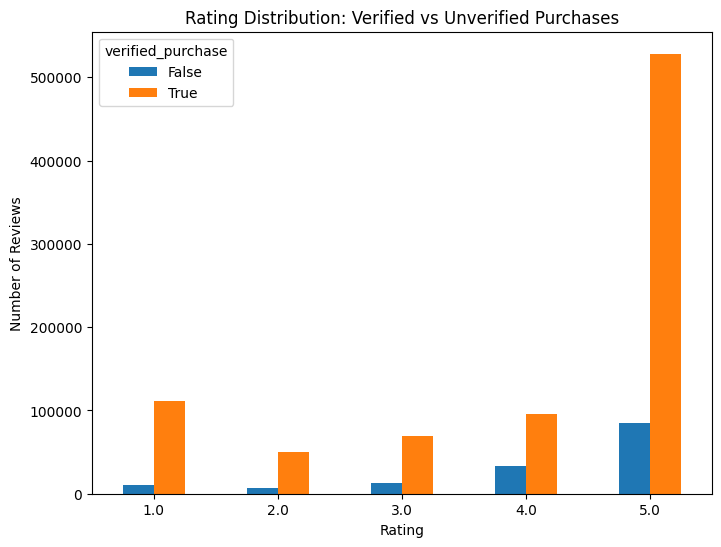

In [20]:
verified_df = df.groupBy("verified_purchase", "rating").count().orderBy("verified_purchase", "rating")
verified_pd = verified_df.toPandas()

# Pivot for plotting
pivot = verified_pd.pivot(index="rating", columns="verified_purchase", values="count").fillna(0)

# Plot
pivot.plot(kind='bar', figsize=(8,6))
plt.title("Rating Distribution: Verified vs Unverified Purchases")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


## Helpful votes per rating

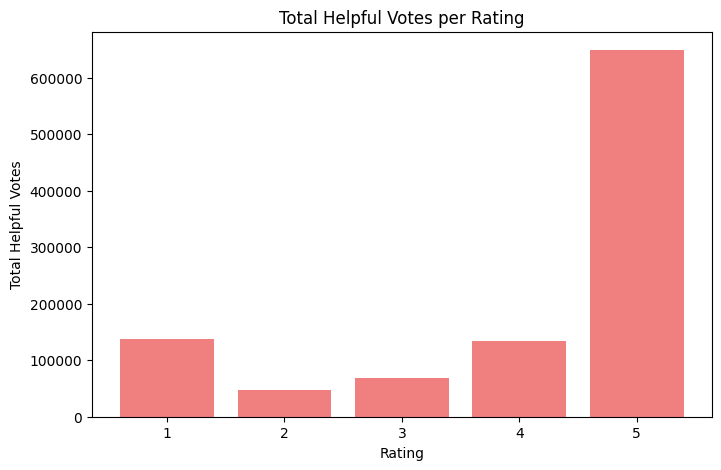

In [21]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# 4. Sum of helpful votes per rating score (not average)
helpful_votes_per_rating = df.groupBy("rating").agg(F.sum("helpful_vote").alias("total_helpful_votes")).orderBy("rating").toPandas()

# Plotting the Total Helpful Votes per Rating
plt.figure(figsize=(8, 5))
plt.bar(helpful_votes_per_rating["rating"], helpful_votes_per_rating["total_helpful_votes"], color='lightcoral')
plt.title("Total Helpful Votes per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Helpful Votes")
plt.xticks(helpful_votes_per_rating["rating"])  # Ensure all rating values are shown on x-axis
plt.show()


## top 10 products with higher rating and lowest rating

In [22]:
from pyspark.sql.functions import col, avg, count
import matplotlib.pyplot as plt

# Calculate average rating with review count, filtering products with at least 5 reviews
product_rating_filtered = df.groupBy("parent_asin") \
                            .agg(avg("rating").alias("avg_rating"),
                                 count("rating").alias("num_reviews")) \
                            .filter(col("num_reviews") >= 5)

# Get top 10 highest-rated products with at least 5 reviews
top_10_highest_rated = product_rating_filtered.orderBy(col("avg_rating").desc()).limit(10).toPandas()

# Get bottom 10 lowest-rated products with at least 5 reviews
bottom_10_lowest_rated = product_rating_filtered.orderBy(col("avg_rating").asc()).limit(10).toPandas()






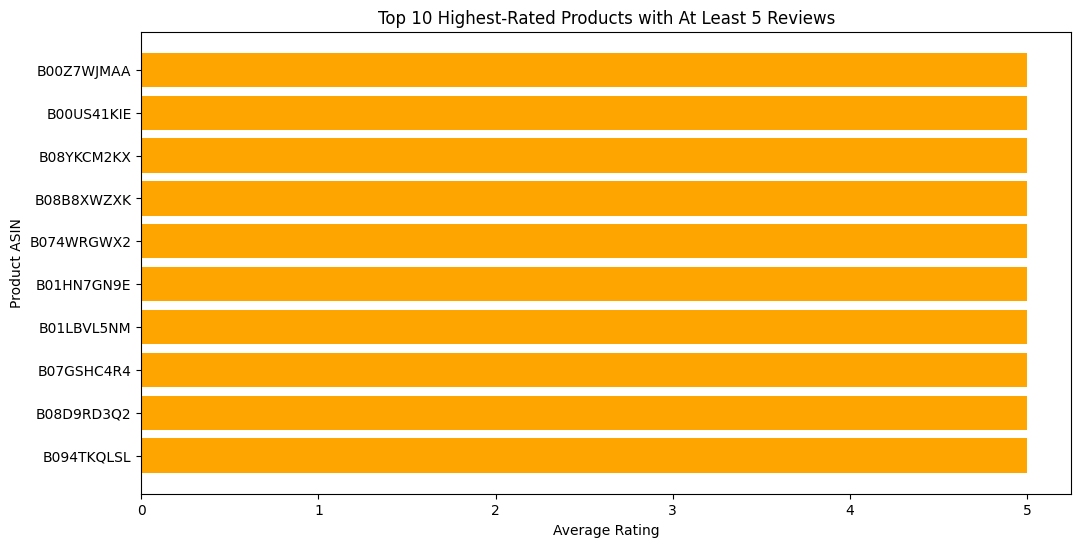

In [23]:
# Plotting Top 10 Highest-Rated Products
plt.figure(figsize=(12, 6))
plt.barh(top_10_highest_rated["parent_asin"], top_10_highest_rated["avg_rating"], color='orange')
plt.title("Top 10 Highest-Rated Products with At Least 5 Reviews")
plt.xlabel("Average Rating")
plt.ylabel("Product ASIN")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rated product at the top
plt.show()

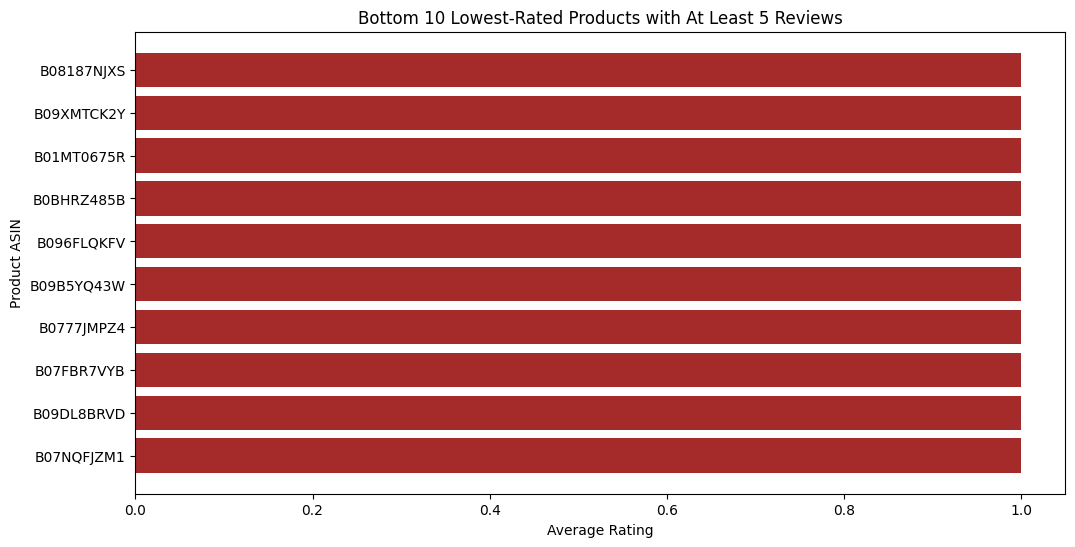

In [24]:
# Plotting Bottom 10 Lowest-Rated Products
plt.figure(figsize=(12, 6))
plt.barh(bottom_10_lowest_rated["parent_asin"], bottom_10_lowest_rated["avg_rating"], color='brown')
plt.title("Bottom 10 Lowest-Rated Products with At Least 5 Reviews")
plt.xlabel("Average Rating")
plt.ylabel("Product ASIN")
plt.gca().invert_yaxis()  # Invert y-axis to show the lowest rated product at the top
plt.show()

## Predicting ratings

# classififcation

## Dealing with the imbalance data

# classification with RF

[Stage 173:==================================>                      (3 + 2) / 5]

Train Metrics:
 - Accuracy:  0.740
 - Precision: 0.547
 - Recall:    0.740
 - F1 Score:  0.629

Test Metrics:
 - Accuracy:  0.741
 - Precision: 0.549
 - Recall:    0.741
 - F1 Score:  0.630


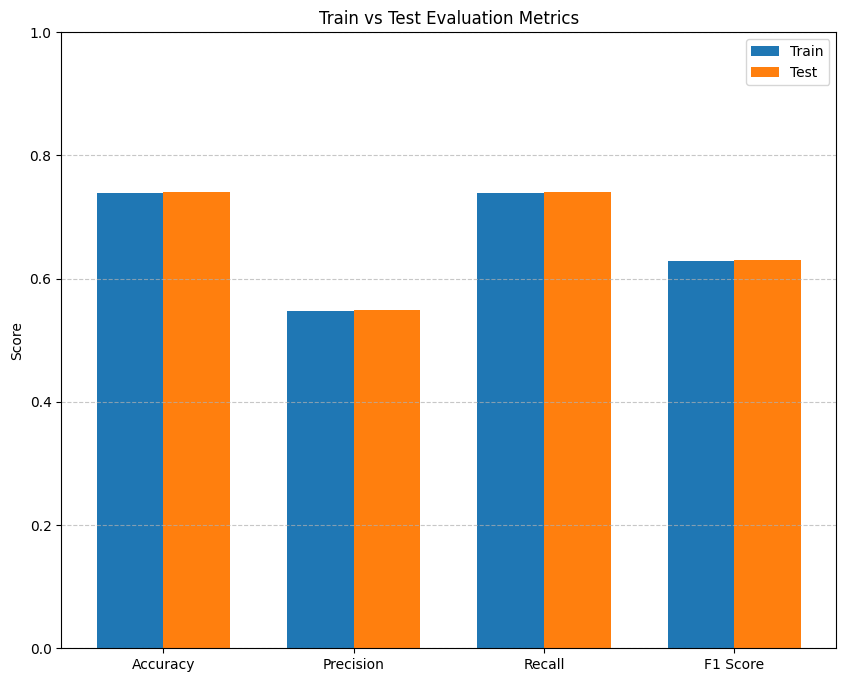

In [25]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when, col, year, from_unixtime
import matplotlib.pyplot as plt
import numpy as np

# 1. Create rating_class (0: low, 1: medium, 2: high)
df_cat = df.withColumn(
    "rating_class",
    when(col("rating") < 3, 0)
    .when((col("rating") >= 3) & (col("rating") < 4), 1)
    .otherwise(2)
)

# 2. Feature Engineering
df_feat = df_cat.withColumn("has_image", when(col("images").isNotNull(), 1).otherwise(0)) \
                .withColumn("review_year", year(from_unixtime(col("timestamp")))) \
                .select("rating_class", "helpful_vote", "verified_purchase", "has_image", "review_year", "title", "text")

# 3. Text Pipeline
tokenizer_title = Tokenizer(inputCol="title", outputCol="title_words")
stopwords_remover_title = StopWordsRemover(inputCol="title_words", outputCol="title_filtered")
hashingTF_title = HashingTF(inputCol="title_filtered", outputCol="title_tf", numFeatures=1000)
idf_title = IDF(inputCol="title_tf", outputCol="title_tfidf")

tokenizer_text = Tokenizer(inputCol="text", outputCol="text_words")
stopwords_remover_text = StopWordsRemover(inputCol="text_words", outputCol="text_filtered")
hashingTF_text = HashingTF(inputCol="text_filtered", outputCol="text_tf", numFeatures=10000)
idf_text = IDF(inputCol="text_tf", outputCol="text_tfidf")

# 4. Assemble all features
assembler = VectorAssembler(
    inputCols=["helpful_vote", "verified_purchase", "has_image", "review_year", "title_tfidf", "text_tfidf"],
    outputCol="features"
)

# 5. Random Forest Classifier
rf = RandomForestClassifier(labelCol="rating_class", featuresCol="features", numTrees=50)

# 6. Pipeline
pipeline = Pipeline(stages=[
    tokenizer_title, stopwords_remover_title, hashingTF_title, idf_title,
    tokenizer_text, stopwords_remover_text, hashingTF_text, idf_text,
    assembler,
    rf
])

# 7. Train-test split
train, test = df_feat.randomSplit([0.8, 0.2], seed=42)

# 8. Train model
model = pipeline.fit(train)

# 9. Predict on train and test
train_predictions = model.transform(train)
test_predictions = model.transform(test)

# 10. Evaluate
evaluator = MulticlassClassificationEvaluator(labelCol="rating_class", predictionCol="prediction")

train_accuracy = evaluator.setMetricName("accuracy").evaluate(train_predictions)
train_precision = evaluator.setMetricName("weightedPrecision").evaluate(train_predictions)
train_recall = evaluator.setMetricName("weightedRecall").evaluate(train_predictions)
train_f1 = evaluator.setMetricName("f1").evaluate(train_predictions)

test_accuracy = evaluator.setMetricName("accuracy").evaluate(test_predictions)
test_precision = evaluator.setMetricName("weightedPrecision").evaluate(test_predictions)
test_recall = evaluator.setMetricName("weightedRecall").evaluate(test_predictions)
test_f1 = evaluator.setMetricName("f1").evaluate(test_predictions)

# 11. Print results
print("Train Metrics:")
print(f" - Accuracy:  {train_accuracy:.3f}")
print(f" - Precision: {train_precision:.3f}")
print(f" - Recall:    {train_recall:.3f}")
print(f" - F1 Score:  {train_f1:.3f}\n")

print("Test Metrics:")
print(f" - Accuracy:  {test_accuracy:.3f}")
print(f" - Precision: {test_precision:.3f}")
print(f" - Recall:    {test_recall:.3f}")
print(f" - F1 Score:  {test_f1:.3f}")

# 12. Plot metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 8))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, test_scores, width, label='Test')

plt.ylabel('Score')
plt.title('Train vs Test Evaluation Metrics')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


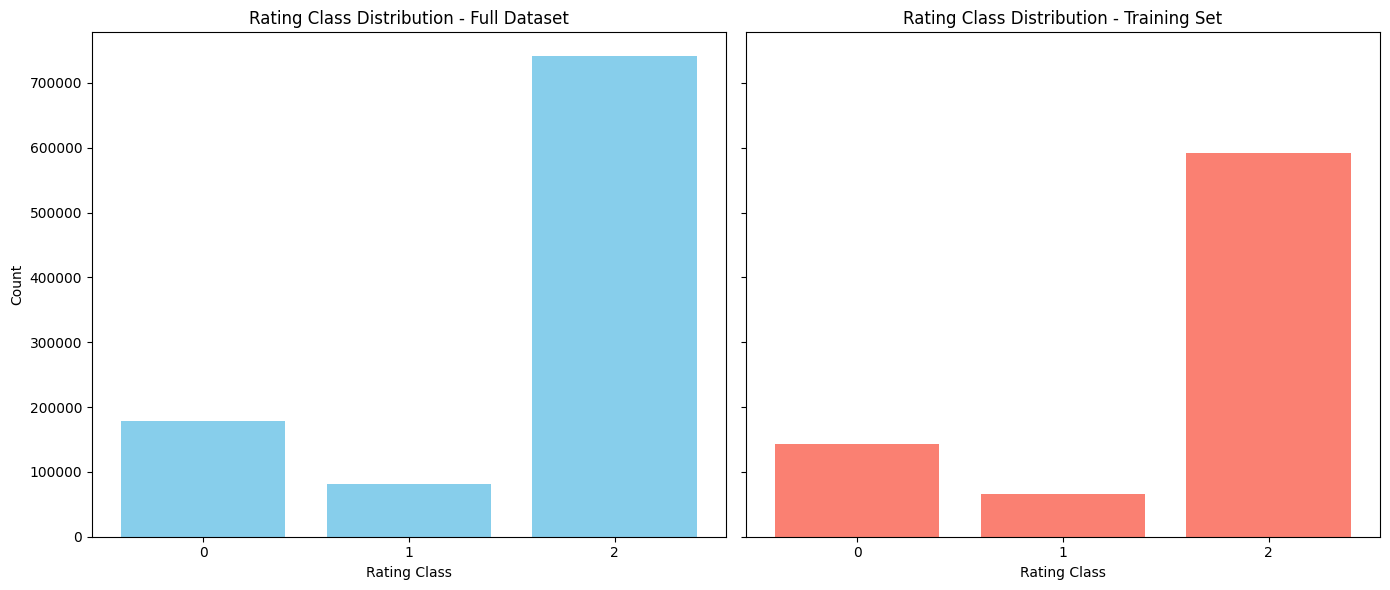

In [26]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# Step 1: Count by rating_class for full dataset
full_counts = df_feat.groupBy("rating_class").agg(count("*").alias("count")).orderBy("rating_class")
full_data = full_counts.toPandas()

# Step 2: Count by rating_class for training set
train_counts = train.groupBy("rating_class").agg(count("*").alias("count")).orderBy("rating_class")
train_data = train_counts.toPandas()

# Step 3: Plot both bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for full dataset
axes[0].bar(full_data["rating_class"], full_data["count"], color='skyblue')
axes[0].set_title("Rating Class Distribution - Full Dataset")
axes[0].set_xlabel("Rating Class")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 1, 2])

# Plot for training dataset
axes[1].bar(train_data["rating_class"], train_data["count"], color='salmon')
axes[1].set_title("Rating Class Distribution - Training Set")
axes[1].set_xlabel("Rating Class")
axes[1].set_xticks([0, 1, 2])

plt.tight_layout()
plt.show()


Confusion Matrix RF:
 [[     0      0  35655]
 [     0      0  16276]
 [     0      0 148416]]


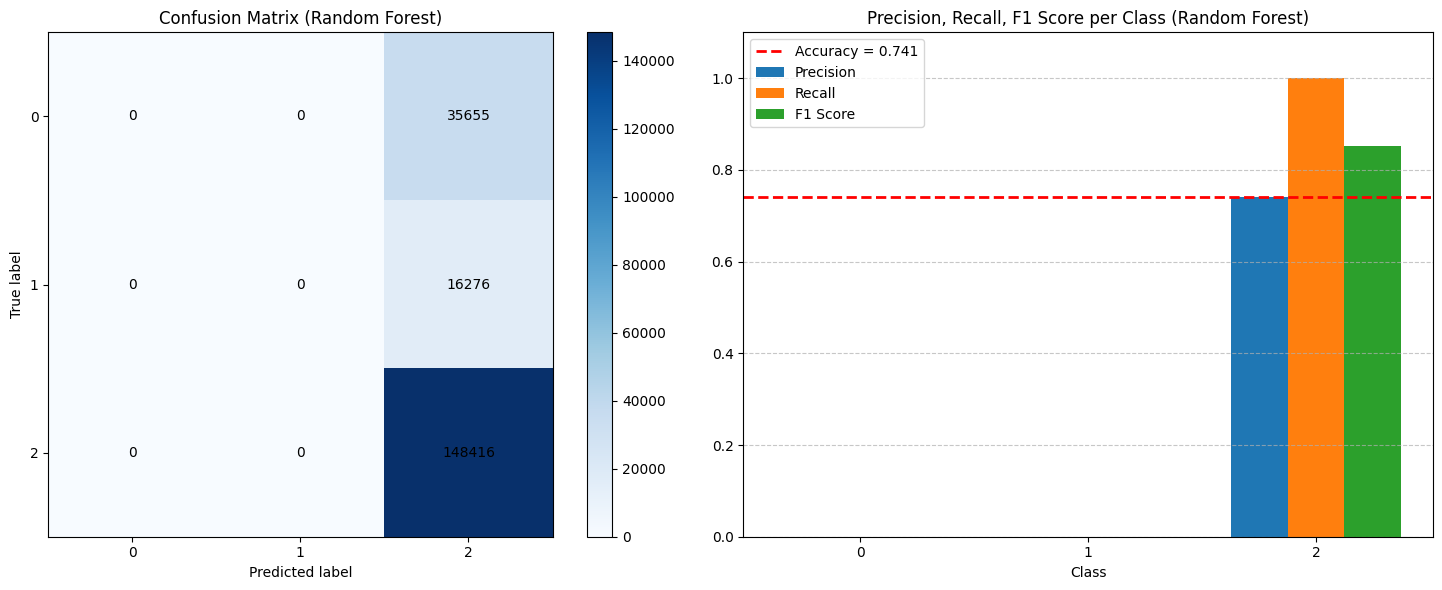

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define classes (0: low, 1: medium, 2: high)
labels_rf = [0, 1, 2]
num_classes_rf = len(labels_rf)

# 1. Build confusion matrix for RF
conf_matrix_rf = np.zeros((num_classes_rf, num_classes_rf), dtype=int)

# Collect RF predictions and true labels as lists
pred_label_rf = test_predictions.select("prediction", "rating_class").collect()

for row in pred_label_rf:
    pred_rf = int(row["prediction"])
    true_rf = int(row["rating_class"])
    conf_matrix_rf[true_rf, pred_rf] += 1

print("Confusion Matrix RF:\n", conf_matrix_rf)

# 2. Calculate per-class precision, recall, F1 score for RF
precision_per_class_rf = []
recall_per_class_rf = []
f1_per_class_rf = []

for i in range(num_classes_rf):
    TP_rf = conf_matrix_rf[i, i]
    FP_rf = conf_matrix_rf[:, i].sum() - TP_rf
    FN_rf = conf_matrix_rf[i, :].sum() - TP_rf
    precision_rf = TP_rf / (TP_rf + FP_rf) if (TP_rf + FP_rf) > 0 else 0
    recall_rf = TP_rf / (TP_rf + FN_rf) if (TP_rf + FN_rf) > 0 else 0
    f1_rf = 2 * precision_rf * recall_rf / (precision_rf + recall_rf) if (precision_rf + recall_rf) > 0 else 0
    
    precision_per_class_rf.append(precision_rf)
    recall_per_class_rf.append(recall_rf)
    f1_per_class_rf.append(f1_rf)

# 3. Plot confusion matrix heatmap for RF
fig_rf, axs_rf = plt.subplots(1, 2, figsize=(15, 6))

im_rf = axs_rf[0].imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
axs_rf[0].set_title("Confusion Matrix (Random Forest)")
axs_rf[0].set_xlabel("Predicted label")
axs_rf[0].set_ylabel("True label")
axs_rf[0].set_xticks(np.arange(num_classes_rf))
axs_rf[0].set_yticks(np.arange(num_classes_rf))
axs_rf[0].set_xticklabels(labels_rf)
axs_rf[0].set_yticklabels(labels_rf)

# Annotate counts on confusion matrix
for i in range(num_classes_rf):
    for j in range(num_classes_rf):
        axs_rf[0].text(j, i, conf_matrix_rf[i, j], ha="center", va="center", color="black")

fig_rf.colorbar(im_rf, ax=axs_rf[0])

# 4. Plot precision, recall, f1 score per class for RF
x_rf = np.arange(num_classes_rf)
width_rf = 0.25

# Accuracy line
axs_rf[1].axhline(y=test_accuracy, color='red', linestyle='--', linewidth=2, label=f'Accuracy = {test_accuracy:.3f}')

axs_rf[1].bar(x_rf - width_rf, precision_per_class_rf, width_rf, label='Precision')
axs_rf[1].bar(x_rf, recall_per_class_rf, width_rf, label='Recall')
axs_rf[1].bar(x_rf + width_rf, f1_per_class_rf, width_rf, label='F1 Score')

axs_rf[1].set_xticks(x_rf)
axs_rf[1].set_xticklabels(labels_rf)
axs_rf[1].set_ylim(0, 1.1)
axs_rf[1].set_xlabel("Class")
axs_rf[1].set_title("Precision, Recall, F1 Score per Class (Random Forest)")
axs_rf[1].legend()
axs_rf[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# classification with LR

In [29]:
from pyspark.ml.classification import LogisticRegression

# Create LR classifier
lr = LogisticRegression(labelCol="rating_class", featuresCol="features", maxIter=20)

# Build LR pipeline by reusing previous feature stages and replacing RF with LR
pipeline_lr = Pipeline(stages=[
    tokenizer_title, stopwords_remover_title, hashingTF_title, idf_title,
    tokenizer_text, stopwords_remover_text, hashingTF_text, idf_text,
    assembler,
    lr
])

# Split train-test (you can reuse df_feat)
train_lr, test_lr = df_feat.randomSplit([0.8, 0.2], seed=42)

# Fit model
model_lr = pipeline_lr.fit(train_lr)

# Predict
train_predictions_lr = model_lr.transform(train_lr)
test_predictions_lr = model_lr.transform(test_lr)

# Evaluate
evaluator_lr = MulticlassClassificationEvaluator(labelCol="rating_class", predictionCol="prediction")

train_accuracy_lr = evaluator_lr.setMetricName("accuracy").evaluate(train_predictions_lr)
train_precision_lr = evaluator_lr.setMetricName("weightedPrecision").evaluate(train_predictions_lr)
train_recall_lr = evaluator_lr.setMetricName("weightedRecall").evaluate(train_predictions_lr)
train_f1_lr = evaluator_lr.setMetricName("f1").evaluate(train_predictions_lr)

test_accuracy_lr = evaluator_lr.setMetricName("accuracy").evaluate(test_predictions_lr)
test_precision_lr = evaluator_lr.setMetricName("weightedPrecision").evaluate(test_predictions_lr)
test_recall_lr = evaluator_lr.setMetricName("weightedRecall").evaluate(test_predictions_lr)
test_f1_lr = evaluator_lr.setMetricName("f1").evaluate(test_predictions_lr)

print("Train Metrics LR:")
print(f" - Accuracy:  {train_accuracy_lr:.3f}")
print(f" - Precision: {train_precision_lr:.3f}")
print(f" - Recall:    {train_recall_lr:.3f}")
print(f" - F1 Score:  {train_f1_lr:.3f}\n")

print("Test Metrics LR:")
print(f" - Accuracy:  {test_accuracy_lr:.3f}")
print(f" - Precision: {test_precision_lr:.3f}")
print(f" - Recall:    {test_recall_lr:.3f}")
print(f" - F1 Score:  {test_f1_lr:.3f}")


[Stage 295:==================================>                      (3 + 2) / 5]

Train Metrics LR:
 - Accuracy:  0.869
 - Precision: 0.855
 - Recall:    0.869
 - F1 Score:  0.856

Test Metrics LR:
 - Accuracy:  0.858
 - Precision: 0.841
 - Recall:    0.858
 - F1 Score:  0.845


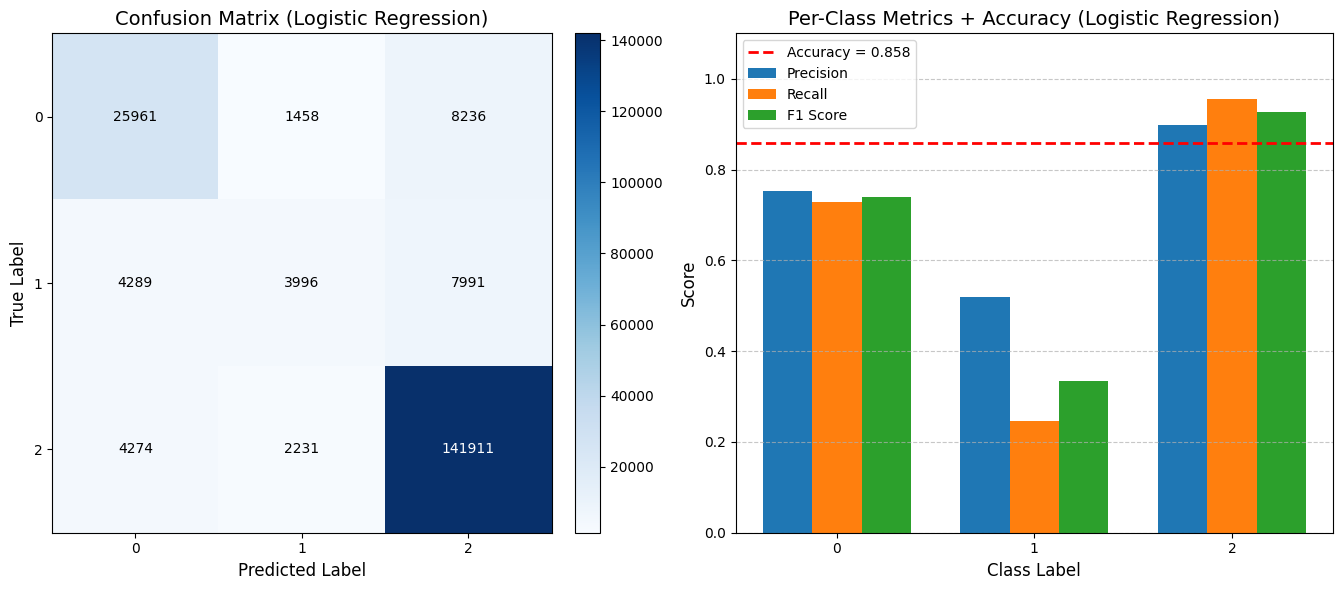

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
labels = [0, 1, 2]
num_classes = len(labels)

# Create confusion matrix using test_predictions_lr
conf_matrix_lr = np.zeros((num_classes, num_classes), dtype=int)
pred_rows_lr = test_predictions_lr.select("rating_class", "prediction").collect()

for row in pred_rows_lr:
    true = int(row["rating_class"])
    pred = int(row["prediction"])
    conf_matrix_lr[true, pred] += 1

# Calculate per-class metrics
precision_list, recall_list, f1_list = [], [], []

for i in range(num_classes):
    TP = conf_matrix_lr[i, i]
    FP = conf_matrix_lr[:, i].sum() - TP
    FN = conf_matrix_lr[i, :].sum() - TP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_list.append(round(precision, 3))
    recall_list.append(round(recall, 3))
    f1_list.append(round(f1, 3))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix heatmap
im = axs[0].imshow(conf_matrix_lr, cmap="Blues", interpolation="nearest")
axs[0].set_title("Confusion Matrix (Logistic Regression)", fontsize=14)
axs[0].set_xlabel("Predicted Label", fontsize=12)
axs[0].set_ylabel("True Label", fontsize=12)
axs[0].set_xticks(np.arange(num_classes))
axs[0].set_yticks(np.arange(num_classes))
axs[0].set_xticklabels(labels)
axs[0].set_yticklabels(labels)

# Add cell values
for i in range(num_classes):
    for j in range(num_classes):
        axs[0].text(j, i, conf_matrix_lr[i, j],
                    ha='center', va='center',
                    color='white' if conf_matrix_lr[i, j] > conf_matrix_lr.max() / 2 else 'black')

fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

# Bar plot for precision, recall, F1
x = np.arange(num_classes)
width = 0.25

axs[1].bar(x - width, precision_list, width, label='Precision')
axs[1].bar(x, recall_list, width, label='Recall')
axs[1].bar(x + width, f1_list, width, label='F1 Score')

# Add horizontal line for accuracy
axs[1].axhline(y=test_accuracy_lr, color='red', linestyle='--', linewidth=2, label=f'Accuracy = {test_accuracy_lr:.3f}')

axs[1].set_title("Per-Class Metrics + Accuracy (Logistic Regression)", fontsize=14)
axs[1].set_xlabel("Class Label", fontsize=12)
axs[1].set_ylabel("Score", fontsize=12)
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()
axs[1].set_ylim(0, 1.1)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Downsampling the Majority Class (High Ratings)

## after balancing the data

In [31]:
from pyspark.sql.functions import col

# Step 1: Get counts for each class
class_counts = df_cat.groupBy("rating_class").count().toPandas()
min_count = class_counts["count"].min()

# Step 2: Sample each class down to the minority class size
balanced_dfs = []
for row in class_counts.itertuples(index=False):
    cls = row.rating_class
    cnt = row.count
    frac = float(min_count) / cnt
    sampled_df = df_cat.filter(col("rating_class") == cls).sample(False, frac, seed=42)
    balanced_dfs.append(sampled_df)

# Step 3: Union all the balanced subsets
from functools import reduce
from pyspark.sql import DataFrame

df_balanced = reduce(DataFrame.unionAll, balanced_dfs)

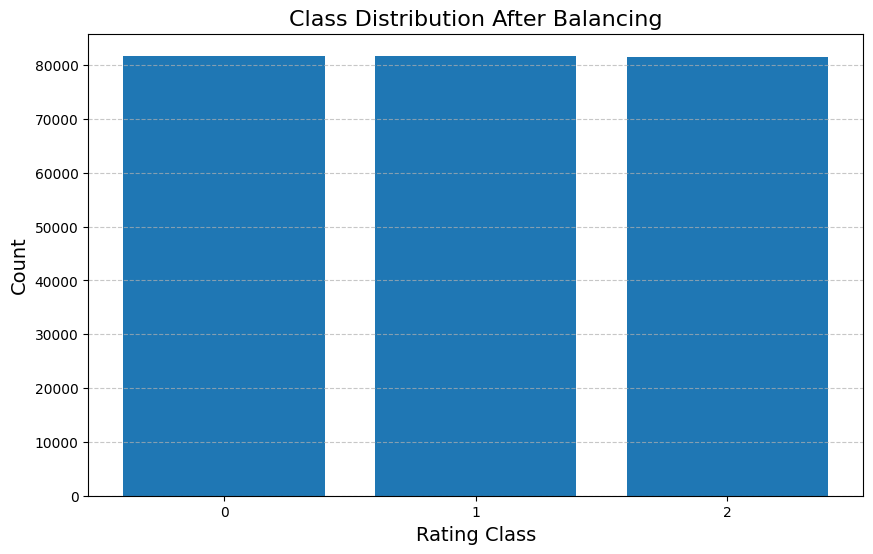

In [32]:
import matplotlib.pyplot as plt

# Step 1: Convert class counts to pandas DataFrame
balanced_counts = df_balanced.groupBy("rating_class").count().orderBy("rating_class").toPandas()

# Step 2: Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(balanced_counts["rating_class"], balanced_counts["count"])

# Step 3: Customize plot
plt.title("Class Distribution After Balancing", fontsize=16)
plt.xlabel("Rating Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(balanced_counts["rating_class"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# classification with RF

In [33]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when, col, year, from_unixtime


# Feature Engineering on other columns
df_feat_balanced = df_balanced.withColumn("has_image", when(col("images").isNotNull(), 1).otherwise(0)) \
                .withColumn("review_year", year(from_unixtime(col("timestamp")))) \
                .select("rating_class", "helpful_vote", "verified_purchase", "has_image", "review_year", "title", "text")

# Classifier
balance_RF = RandomForestClassifier(labelCol="rating_class", featuresCol="features", numTrees=50)

# Pipeline
balance_RF_pipeline = Pipeline(stages=[
    tokenizer_title, stopwords_remover_title, hashingTF_title, idf_title,
    tokenizer_text, stopwords_remover_text, hashingTF_text, idf_text,
    assembler,
    balance_RF
])

# Train-test split
train_RF_balance, test_RF_balance = df_feat_balanced.randomSplit([0.8, 0.2], seed=42)

# Train model
balance_RF_model = balance_RF_pipeline.fit(train_RF_balance)

# Predict
balance_RF_predictions = balance_RF_model.transform(test_RF_balance)

# Evaluate accuracy
evaluator_RF_balance = MulticlassClassificationEvaluator(
    labelCol="rating_class", predictionCol="prediction", metricName="accuracy"
)
accuracy_RF_balance = evaluator_RF_balance.evaluate(balance_RF_predictions)
print(f"Test Accuracy (Random Forest Balanced) = {accuracy_RF_balance:.3f}")

# Show predictions
balance_RF_predictions.select("rating_class", "prediction", "probability").show(5)


Test Accuracy (Random Forest Balanced) = 0.613


[Stage 362:=====================================================> (81 + 2) / 83]

+------------+----------+--------------------+
|rating_class|prediction|         probability|
+------------+----------+--------------------+
|           1|       1.0|[0.32438474438398...|
|           1|       1.0|[0.31129434426026...|
|           1|       1.0|[0.32636893504819...|
|           1|       1.0|[0.32443402248860...|
|           1|       2.0|[0.32103107385372...|
+------------+----------+--------------------+
only showing top 5 rows



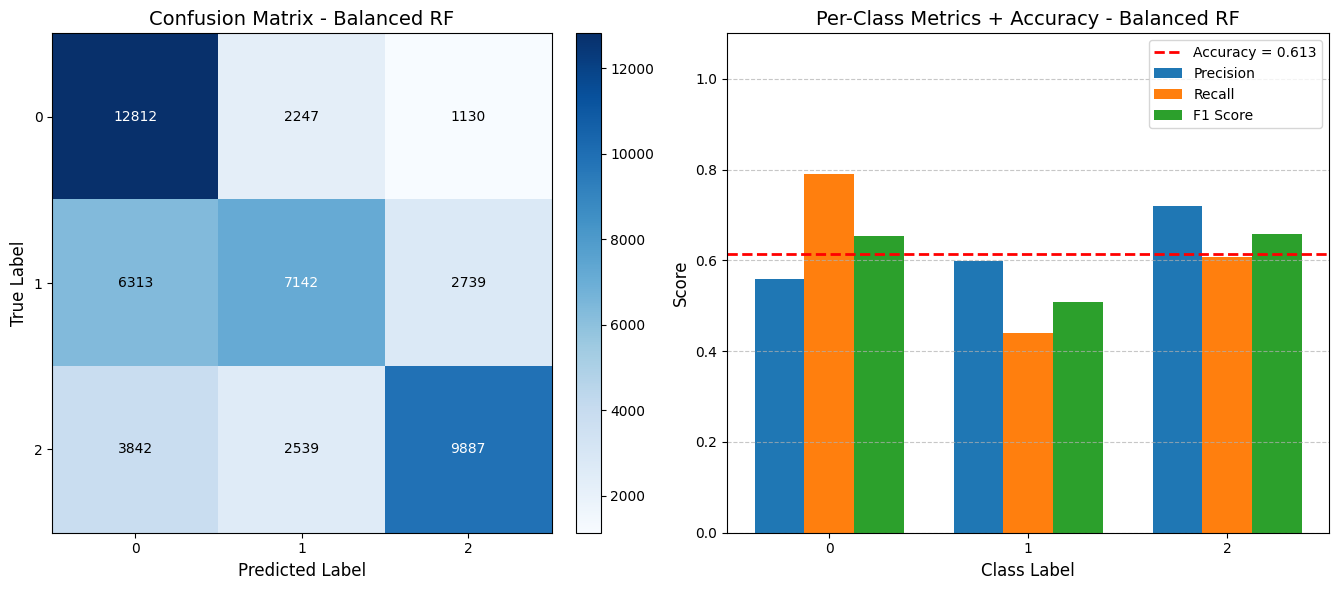

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
labels_rf = [0, 1, 2]
num_classes_rf = len(labels_rf)

# Build confusion matrix
conf_matrix_rf = np.zeros((num_classes_rf, num_classes_rf), dtype=int)
pred_label_rf = balance_RF_predictions.select("prediction", "rating_class").collect()

for row in pred_label_rf:
    pred_rf = int(row["prediction"])
    true_rf = int(row["rating_class"])
    conf_matrix_rf[true_rf, pred_rf] += 1

# Compute metrics
precision_per_class_rf, recall_per_class_rf, f1_per_class_rf = [], [], []

for i in range(num_classes_rf):
    TP = conf_matrix_rf[i, i]
    FP = conf_matrix_rf[:, i].sum() - TP
    FN = conf_matrix_rf[i, :].sum() - TP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class_rf.append(round(precision, 3))
    recall_per_class_rf.append(round(recall, 3))
    f1_per_class_rf.append(round(f1, 3))

# Overall accuracy (already calculated before)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="rating_class", predictionCol="prediction", metricName="accuracy"
)
accuracy_rf = evaluator.evaluate(balance_RF_predictions)

# Plotting
fig_rf, axs_rf = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix heatmap
im = axs_rf[0].imshow(conf_matrix_rf, cmap='Blues', interpolation='nearest')
axs_rf[0].set_title("Confusion Matrix - Balanced RF", fontsize=14)
axs_rf[0].set_xlabel("Predicted Label", fontsize=12)
axs_rf[0].set_ylabel("True Label", fontsize=12)
axs_rf[0].set_xticks(np.arange(num_classes_rf))
axs_rf[0].set_yticks(np.arange(num_classes_rf))
axs_rf[0].set_xticklabels(labels_rf)
axs_rf[0].set_yticklabels(labels_rf)

for i in range(num_classes_rf):
    for j in range(num_classes_rf):
        axs_rf[0].text(j, i, conf_matrix_rf[i, j],
                      ha="center", va="center",
                      color="white" if conf_matrix_rf[i, j] > conf_matrix_rf.max() / 2 else "black")

fig_rf.colorbar(im, ax=axs_rf[0], fraction=0.046, pad=0.04)

# Bar plot with accuracy line
x = np.arange(num_classes_rf)
width = 0.25

axs_rf[1].bar(x - width, precision_per_class_rf, width, label='Precision')
axs_rf[1].bar(x, recall_per_class_rf, width, label='Recall')
axs_rf[1].bar(x + width, f1_per_class_rf, width, label='F1 Score')

# Horizontal line for accuracy
axs_rf[1].axhline(y=accuracy_rf, color='red', linestyle='--', linewidth=2, label=f'Accuracy = {accuracy_rf:.3f}')

axs_rf[1].set_xticks(x)
axs_rf[1].set_xticklabels(labels_rf)
axs_rf[1].set_ylim(0, 1.1)
axs_rf[1].set_title("Per-Class Metrics + Accuracy - Balanced RF", fontsize=14)
axs_rf[1].set_xlabel("Class Label", fontsize=12)
axs_rf[1].set_ylabel("Score", fontsize=12)
axs_rf[1].legend()
axs_rf[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



## classification with LR

In [35]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="rating_class", featuresCol="features", maxIter=100, regParam=0.1)

pipeline_lr = Pipeline(stages=[
    tokenizer_title, stopwords_remover_title, hashingTF_title, idf_title,
    tokenizer_text, stopwords_remover_text, hashingTF_text, idf_text,
    assembler,
    lr
])

# Train-test split
train_lr_balance, test_lr_balance = df_feat_balanced.randomSplit([0.8, 0.2], seed=42)

# Train model
balance_lr_model = pipeline_lr.fit(train_lr_balance)

# Predict
balance_lr_predictions = balance_lr_model.transform(test_lr_balance)

# Evaluate accuracy
evaluator_lr_balance = MulticlassClassificationEvaluator(
    labelCol="rating_class", predictionCol="prediction", metricName="accuracy"
)
accuracy_lr_balance = evaluator_RF_balance.evaluate(balance_lr_predictions)
print(f"Test Accuracy (Linera Regression Balanced) = {accuracy_lr_balance:.3f}")

# Show predictions
balance_lr_predictions.select("rating_class", "prediction", "probability").show(5)


Test Accuracy (Linera Regression Balanced) = 0.720


[Stage 519:======================================================>(82 + 1) / 83]

+------------+----------+--------------------+
|rating_class|prediction|         probability|
+------------+----------+--------------------+
|           1|       2.0|[0.03014863988314...|
|           1|       1.0|[0.02172968122977...|
|           1|       1.0|[0.25102482367983...|
|           1|       1.0|[0.03821121041969...|
|           1|       1.0|[0.10404516361096...|
+------------+----------+--------------------+
only showing top 5 rows



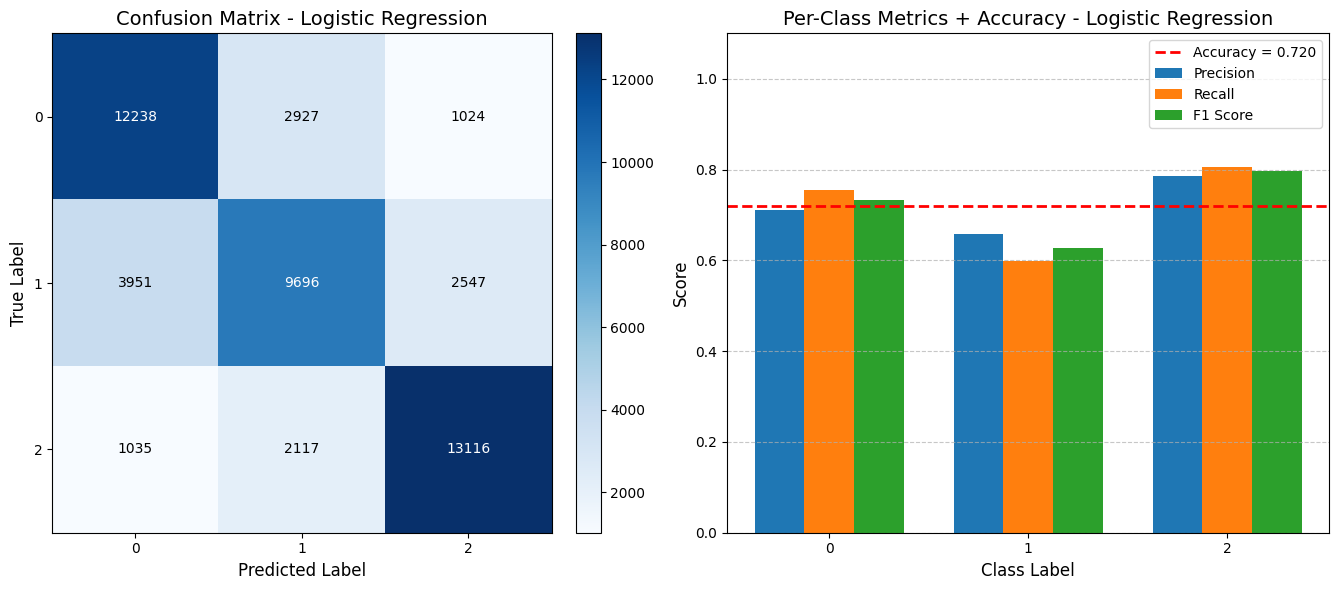

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
labels_lr = [0, 1, 2]
num_classes_lr = len(labels_lr)

# Confusion matrix
conf_matrix_lr = np.zeros((num_classes_lr, num_classes_lr), dtype=int)
pred_label_lr = balance_lr_predictions.select("prediction", "rating_class").collect()

for row in pred_label_lr:
    pred = int(row["prediction"])
    true = int(row["rating_class"])
    conf_matrix_lr[true, pred] += 1

# Compute per-class precision, recall, and F1
precision_per_class_lr, recall_per_class_lr, f1_per_class_lr = [], [], []

for i in range(num_classes_lr):
    TP = conf_matrix_lr[i, i]
    FP = conf_matrix_lr[:, i].sum() - TP
    FN = conf_matrix_lr[i, :].sum() - TP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class_lr.append(round(precision, 3))
    recall_per_class_lr.append(round(recall, 3))
    f1_per_class_lr.append(round(f1, 3))

# Plotting
fig_lr, axs_lr = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix plot
im = axs_lr[0].imshow(conf_matrix_lr, cmap='Blues', interpolation='nearest')
axs_lr[0].set_title("Confusion Matrix - Logistic Regression", fontsize=14)
axs_lr[0].set_xlabel("Predicted Label", fontsize=12)
axs_lr[0].set_ylabel("True Label", fontsize=12)
axs_lr[0].set_xticks(np.arange(num_classes_lr))
axs_lr[0].set_yticks(np.arange(num_classes_lr))
axs_lr[0].set_xticklabels(labels_lr)
axs_lr[0].set_yticklabels(labels_lr)

for i in range(num_classes_lr):
    for j in range(num_classes_lr):
        axs_lr[0].text(j, i, conf_matrix_lr[i, j],
                      ha="center", va="center",
                      color="white" if conf_matrix_lr[i, j] > conf_matrix_lr.max() / 2 else "black")

fig_lr.colorbar(im, ax=axs_lr[0], fraction=0.046, pad=0.04)

# Bar plot with accuracy line
x = np.arange(num_classes_lr)
width = 0.25

axs_lr[1].bar(x - width, precision_per_class_lr, width, label='Precision')
axs_lr[1].bar(x, recall_per_class_lr, width, label='Recall')
axs_lr[1].bar(x + width, f1_per_class_lr, width, label='F1 Score')

# Accuracy line
axs_lr[1].axhline(y=accuracy_lr_balance, color='red', linestyle='--', linewidth=2, label=f'Accuracy = {accuracy_lr_balance:.3f}')

axs_lr[1].set_xticks(x)
axs_lr[1].set_xticklabels(labels_lr)
axs_lr[1].set_ylim(0, 1.1)
axs_lr[1].set_title("Per-Class Metrics + Accuracy - Logistic Regression", fontsize=14)
axs_lr[1].set_xlabel("Class Label", fontsize=12)
axs_lr[1].set_ylabel("Score", fontsize=12)
axs_lr[1].legend()
axs_lr[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## LR with Crosss validation

In [37]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 1. Define model
lr = LogisticRegression(labelCol="rating_class", featuresCol="features", maxIter=100)

# 2. Define pipeline
pipeline_lr = Pipeline(stages=[
    tokenizer_title, stopwords_remover_title, hashingTF_title, idf_title,
    tokenizer_text, stopwords_remover_text, hashingTF_text, idf_text,
    assembler,
    lr
])

# 3. Train-test split
train_lr_balance, test_lr_balance = df_feat_balanced.randomSplit([0.8, 0.2], seed=42)

# 4. Define parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# 5. Define evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="rating_class", predictionCol="prediction", metricName="accuracy"
)

# 6. Define cross-validator
crossval = CrossValidator(
    estimator=pipeline_lr,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,     # 3-fold cross-validation
    parallelism=2   # Adjust based on your cluster size
)

# 7. Run cross-validation, and choose the best set of parameters
cv_model = crossval.fit(train_lr_balance)

# 8. Make predictions on test set
cv_predictions = cv_model.transform(test_lr_balance)

# 9. Evaluate accuracy on test set
cv_accuracy = evaluator.evaluate(cv_predictions)
print(f"Cross-Validated Test Accuracy (Logistic Regression) = {cv_accuracy:.3f}")

# Show sample predictions
cv_predictions.select("rating_class", "prediction", "probability").show(5)

# Optional: Show best model params
best_model = cv_model.bestModel.stages[-1]
print("Best regParam:", best_model._java_obj.getRegParam())
print("Best elasticNetParam:", best_model._java_obj.getElasticNetParam())


Cross-Validated Test Accuracy (Logistic Regression) = 0.721


[Stage 2881:====================================================> (81 + 2) / 83]

+------------+----------+--------------------+
|rating_class|prediction|         probability|
+------------+----------+--------------------+
|           1|       2.0|[0.18813614843672...|
|           1|       1.0|[0.12789826610722...|
|           1|       2.0|[0.29787541510955...|
|           1|       1.0|[0.19385824436090...|
|           1|       1.0|[0.20088904897621...|
+------------+----------+--------------------+
only showing top 5 rows

Best regParam: 1.0
Best elasticNetParam: 0.0


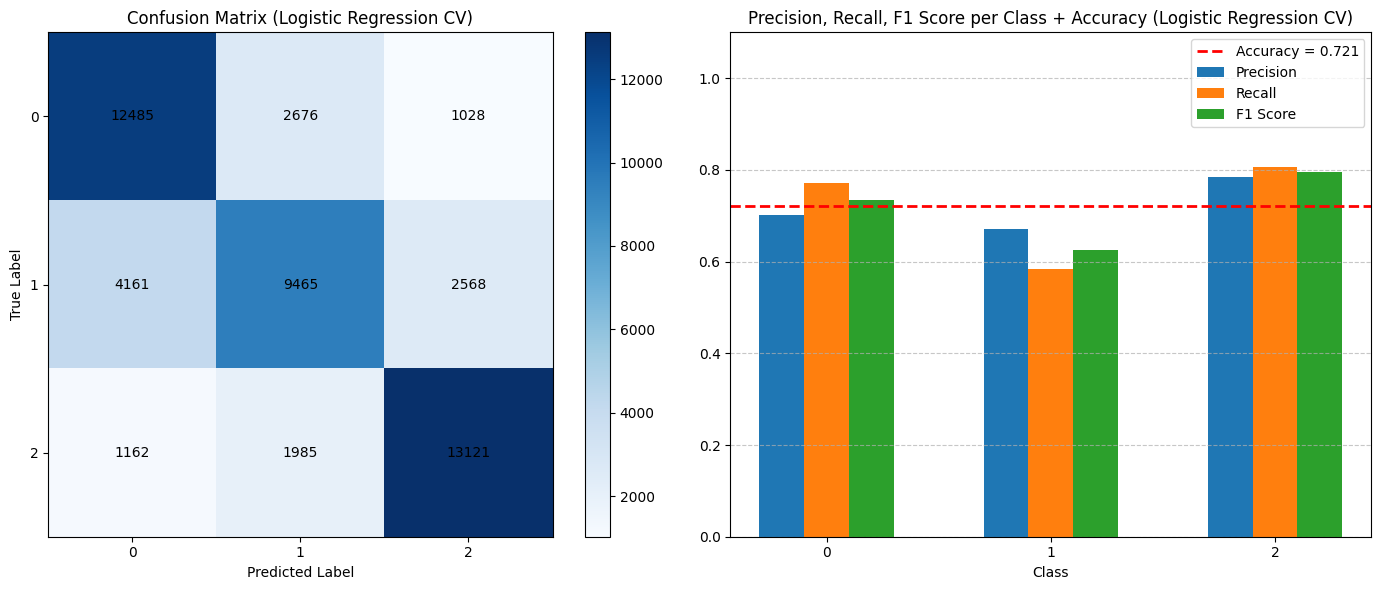

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# 1. Collect predictions and true labels as lists
pred_label_list = cv_predictions.select("prediction", "rating_class").collect()
y_pred = [int(row["prediction"]) for row in pred_label_list]
y_true = [int(row["rating_class"]) for row in pred_label_list]

# 2. Confusion matrix
labels = sorted(set(y_true))  # e.g. [0, 1, 2]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 3. Calculate precision, recall, f1-score per class
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred, labels=labels, zero_division=0
)

# 4. Overall accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)

# 5. Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix heatmap
im = axs[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0].set_title("Confusion Matrix (Logistic Regression CV)")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")
axs[0].set_xticks(np.arange(len(labels)))
axs[0].set_yticks(np.arange(len(labels)))
axs[0].set_xticklabels(labels)
axs[0].set_yticklabels(labels)

# Annotate counts
for i in range(len(labels)):
    for j in range(len(labels)):
        axs[0].text(j, i, cm[i, j], ha="center", va="center", color="black")

fig.colorbar(im, ax=axs[0])

# Bar plot for precision, recall, f1 score
x = np.arange(len(labels))
width = 0.2

axs[1].bar(x - width, precision, width, label='Precision')
axs[1].bar(x, recall, width, label='Recall')
axs[1].bar(x + width, f1, width, label='F1 Score')

# Accuracy line plot
#axs[1].plot(x, [accuracy] * len(x), color='red', linestyle='--', linewidth=2, marker='o', label=f'Accuracy = {accuracy:.3f}')
# Accuracy line
axs[1].axhline(y=cv_accuracy, color='red', linestyle='--', linewidth=2, label=f'Accuracy = {cv_accuracy:.3f}')
# Labeling
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_ylim(0, 1.1)
axs[1].set_xlabel("Class")
axs[1].set_title("Precision, Recall, F1 Score per Class + Accuracy (Logistic Regression CV)")
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

